In [30]:
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
import numpy as np
import geopandas as gp
from matplotlib.pyplot import plot
import rasterio.mask
import matplotlib.pyplot as plt
from utils import *

lakes_train_test = "/data1/malto/sigspatial/lakes_regions.gpkg"
predicted_poly_path = "/home/fborra/sigspatialcup2023/lake_polygons_test.gpkg"
regions = gp.read_file(lakes_train_test)
predicted_poly = gp.read_file(predicted_poly_path)

In [31]:
regions

,region_num,geometry
0,1,"POLYGON ((-5449321.891 10875536.208, -5484512...."
1,2,"POLYGON ((-5581347.050 10549567.616, -5667660...."
2,3,"POLYGON ((-5677516.471 10248298.652, -5678009...."
3,4,"POLYGON ((-5678009.204 9927217.104, -5677904.5..."
4,5,"POLYGON ((-2366209.810 15614995.673, -2476111...."
5,6,"POLYGON ((-3526251.976 14894948.043, -3462201...."


In [32]:
predicted_poly.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

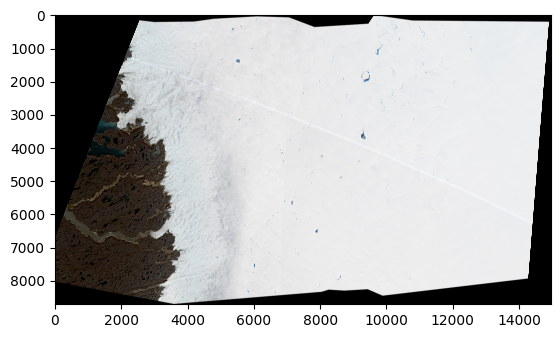

In [33]:
img_region_path = Path("/data1/malto/sigspatial/test/")
img = os.listdir(img_region_path)[0]
img_region = rasterio.open(img_region_path / img)
img_array = img_region.read()
plt.imshow(np.transpose(img_array, ((1, 2, 0))))

In [34]:
os.listdir(img_region_path)

['Greenland26X_22W_Sentinel2_2019-08-25_29.tif_region_2.tif',
 'Greenland26X_22W_Sentinel2_2019-07-31_25.tif_region_5.tif',
 'Greenland26X_22W_Sentinel2_2019-06-03_05.tif_region_3.tif',
 'Greenland26X_22W_Sentinel2_2019-08-25_29.tif_region_6.tif',
 'Greenland26X_22W_Sentinel2_2019-07-31_25.tif_region_1.tif',
 'Greenland26X_22W_Sentinel2_2019-06-19_20.tif_region_4.tif',
 'Greenland26X_22W_Sentinel2_2019-07-31_25.tif_region_3.tif',
 'Greenland26X_22W_Sentinel2_2019-06-03_05.tif_region_1.tif',
 'Greenland26X_22W_Sentinel2_2019-06-19_20.tif_region_2.tif',
 'Greenland26X_22W_Sentinel2_2019-06-03_05.tif_region_5.tif',
 'Greenland26X_22W_Sentinel2_2019-08-25_29.tif_region_4.tif',
 'Greenland26X_22W_Sentinel2_2019-06-19_20.tif_region_6.tif']

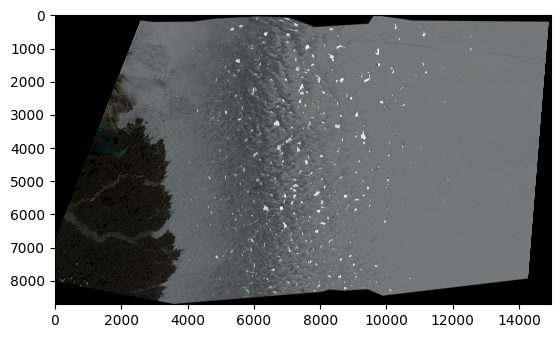

In [35]:
img_region_path = Path("/data1/malto/sigspatial/test/")
img = os.listdir(img_region_path)[8]
img_region = rasterio.open(img_region_path/ img)
img_array = img_region.read()
lake_geom = predicted_poly[predicted_poly['region_num'] == '2']['geometry']
out_image, _ = rasterio.mask.mask(img_region, lake_geom)
out_image[out_image != 0] = 255

fig, ax = plt.subplots()
ax.imshow(np.transpose(img_array, ((1, 2, 0))))
ax.imshow(np.transpose(out_image, ((1, 2, 0))), alpha=0.5)
plt.show()